In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import MissingIndicator

In [2]:
# to do

# clean up dataset once and for all
# add methods used for cleaning
# add del statements

In [3]:
# NOTES
#

In [4]:
# load data into a DataFrame object
df = pd.read_csv('data/kc_house_Data.csv')

In [5]:
# split df into categorical and numerical variable types
df = df.drop(['id'], axis=1)
df_num = df.select_dtypes(include=np.number)
df_cat = df.drop(df_num.columns, axis=1)

In [6]:
# clean up df_cat
df_cat['sqft_basement'] = df_cat['sqft_basement'].replace(to_replace='?', value=np.nan)
df_cat['sqft_basement'] = pd.to_numeric(df_cat['sqft_basement'])
df_num['sqft_basement'] = df_cat['sqft_basement']
df_cat = df_cat.drop(['sqft_basement'], axis = 1)

df_cat['grade'] = df_cat['grade'].map(lambda x: int(x[0]))

df_cat['month_sold'] = df_cat['date'].map(lambda x: int(x.split('/')[0]))
df_cat['year_sold'] = df_cat['date'].map(lambda x: int(x.split('/')[-1]))
df_cat = df_cat.drop(['date'], axis=1)

<ipython-input-6-3bd482b1fbeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['sqft_basement'] = df_cat['sqft_basement']


In [7]:
waterfront = df_cat[['waterfront']]
missing_indicator = MissingIndicator()
missing_indicator.fit(waterfront)
waterfront_missing = missing_indicator.transform(waterfront)
df_cat["waterfront_missing"] = waterfront_missing

df_cat['waterfront'] = df_cat['waterfront'].fillna('NO')
df_cat.waterfront = df_cat.waterfront.eq('YES').mul(1)

In [8]:
condition_dummies = pd.get_dummies(df_cat['condition'], prefix='cond_', drop_first=True)

df_cat = df_cat.drop(['condition'], axis=1)
df_cat = pd.concat([df_cat, condition_dummies], axis=1)

In [9]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   waterfront          21597 non-null  int64 
 1   view                21534 non-null  object
 2   grade               21597 non-null  int64 
 3   month_sold          21597 non-null  int64 
 4   year_sold           21597 non-null  int64 
 5   waterfront_missing  21597 non-null  bool  
 6   cond__Fair          21597 non-null  uint8 
 7   cond__Good          21597 non-null  uint8 
 8   cond__Poor          21597 non-null  uint8 
 9   cond__Very Good     21597 non-null  uint8 
dtypes: bool(1), int64(4), object(1), uint8(4)
memory usage: 949.2+ KB


In [10]:
df_cat.view.isna().sum()

63

In [11]:
df_cat.view = df_cat.view.fillna('NONE')

In [12]:
view_dummies = pd.get_dummies(df_cat.view, prefix='view_', drop_first=True)
df_cat = df_cat.drop(['view'], axis=1)
df_cat = pd.concat([df_cat, view_dummies], axis=1)

In [13]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   waterfront          21597 non-null  int64
 1   grade               21597 non-null  int64
 2   month_sold          21597 non-null  int64
 3   year_sold           21597 non-null  int64
 4   waterfront_missing  21597 non-null  bool 
 5   cond__Fair          21597 non-null  uint8
 6   cond__Good          21597 non-null  uint8
 7   cond__Poor          21597 non-null  uint8
 8   cond__Very Good     21597 non-null  uint8
 9   view__EXCELLENT     21597 non-null  uint8
 10  view__FAIR          21597 non-null  uint8
 11  view__GOOD          21597 non-null  uint8
 12  view__NONE          21597 non-null  uint8
dtypes: bool(1), int64(4), uint8(8)
memory usage: 864.8 KB


In [14]:
df_num.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_basement     454
dtype: int64

In [15]:
df_num.sqft_basement = df_num.sqft_basement.fillna(0)

/Users/nobletang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df_num.yr_renovated = df_num.yr_renovated.fillna(0)

In [17]:
df_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [18]:
df_final = pd.concat([df_num, df_cat], axis=1)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21597 non-null  float64
 1   bedrooms            21597 non-null  int64  
 2   bathrooms           21597 non-null  float64
 3   sqft_living         21597 non-null  int64  
 4   sqft_lot            21597 non-null  int64  
 5   floors              21597 non-null  float64
 6   sqft_above          21597 non-null  int64  
 7   yr_built            21597 non-null  int64  
 8   yr_renovated        21597 non-null  float64
 9   zipcode             21597 non-null  int64  
 10  lat                 21597 non-null  float64
 11  long                21597 non-null  float64
 12  sqft_living15       21597 non-null  int64  
 13  sqft_lot15          21597 non-null  int64  
 14  sqft_basement       21597 non-null  float64
 15  waterfront          21597 non-null  int64  
 16  grad

In [20]:
df_final.to_csv('data/df_untransformed.csv', index=False)

In [21]:
!ls

Kelsey_Workbook.ipynb          data_preprocessing.ipynb
README.md                      deletefolder
data                           notebook_main.ipynb
data_preprocessing-noble.ipynb


In [22]:
!cd data

In [23]:
!ls data

categorical_df.csv   continuous_df.csv    kc_house_data.csv
column_names.md      df_untransformed.csv master_df


In [24]:
df_train = df_final.sample(frac=0.5, random_state=2)
df_test = df_final.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

df_test.shape

(10799, 28)

(array([1.180e+02, 7.540e+02, 1.569e+03, 1.672e+03, 1.502e+03, 1.207e+03,
        1.015e+03, 7.440e+02, 5.600e+02, 4.230e+02, 3.030e+02, 2.020e+02,
        1.260e+02, 6.800e+01, 8.600e+01, 8.600e+01, 3.800e+01, 4.200e+01,
        2.800e+01, 4.200e+01, 2.800e+01, 3.200e+01, 1.600e+01, 2.200e+01,
        1.300e+01, 9.000e+00, 2.000e+00, 8.000e+00, 6.000e+00, 6.000e+00,
        8.000e+00, 8.000e+00, 9.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

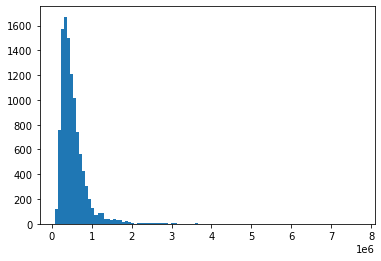

In [25]:
fig, ax = plt.subplots()

ax.hist(y_train, bins=100)

<AxesSubplot:>

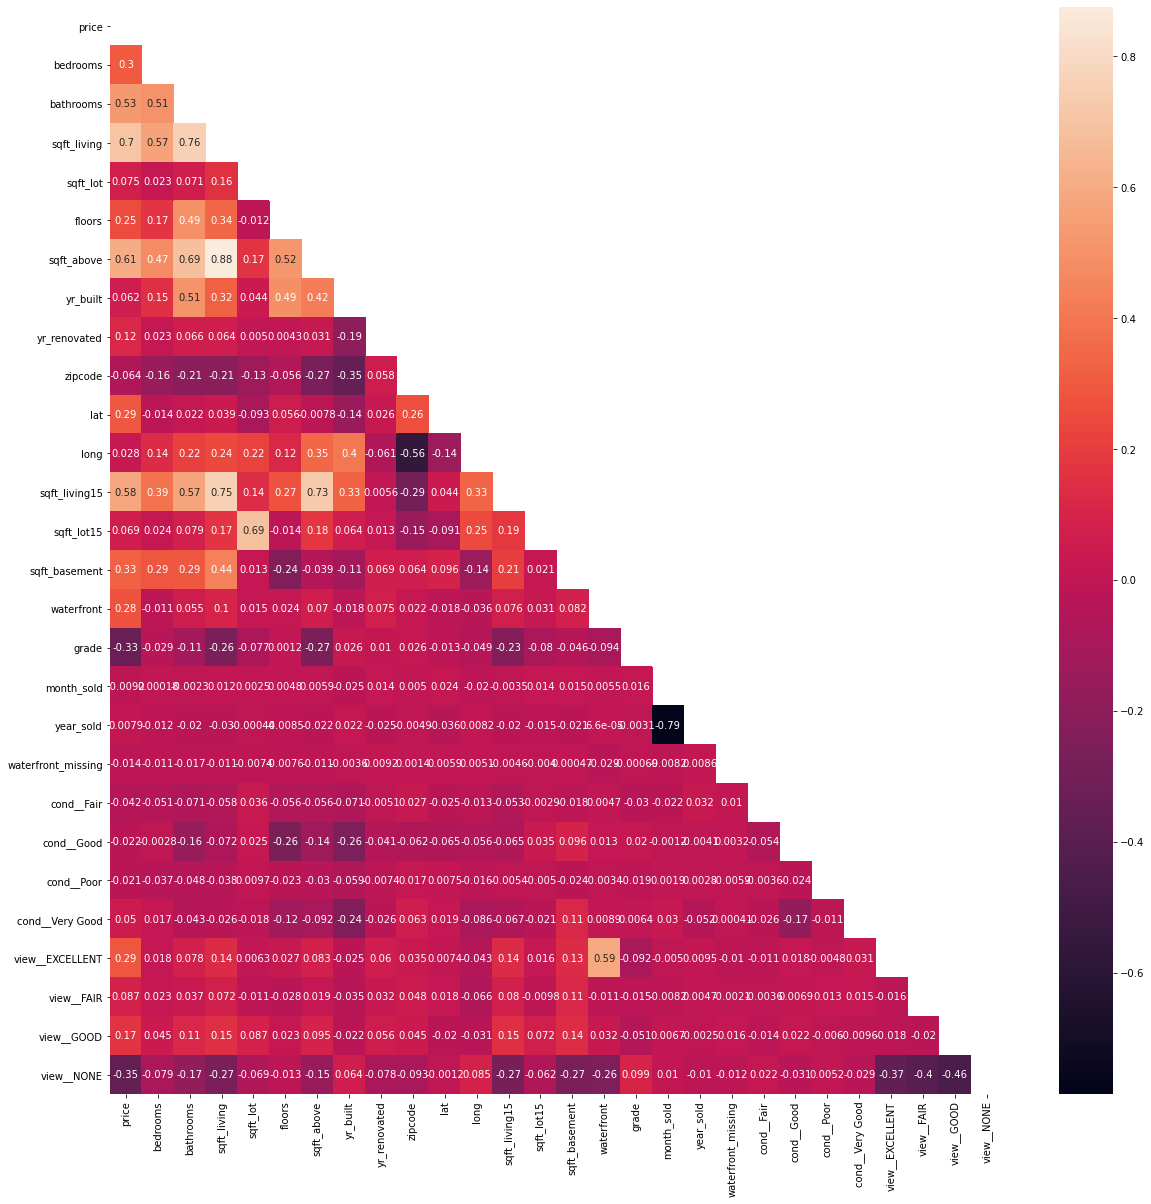

In [26]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

most_correlated_feature = 'sqft_living'
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4966579575861622
Validation score: 0.4845427580134009


In [28]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [29]:
df.shape

(21597, 20)

In [30]:
y_train.shape

(10798,)

# baseline model

In [31]:
from sklearn.dummy import DummyRegressor

# df to sample from for training and testing set
df_sample = df_final # may need to change this depending on df name

df_train = df_sample.sample(frac=0.5, random_state=2)
df_test = df_sample.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']



dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_test, y_test)

-0.00020914664819526863

# baseline model using master dataframe

In [32]:
master_df = pd.read_csv('data/master_df')

In [33]:
from sklearn.dummy import DummyRegressor

# df to sample from for training and testing set
df_sample = master_df # may need to change this depending on df name

df_train = df_sample.sample(frac=0.5, random_state=2)
df_test = df_sample.drop(df_train.index)

X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']



dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_test, y_test)

-5.592480262373023e-05

# finding correlations

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.heatmap(abs(combine.corr()), annot = True)
#     plt.show()
    
    #Makes modelb
    X_const = sm.add_constant(X_train)
    linreg_model = sm.OLS(y_train, X_train).fit()
    
    #Grabs predictions
    train_predict = linreg_model.predict(X_train)
    test_predict = linreg_model.predict(X_test)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared_adj))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    #Also check JB value in model summary (<6)
    
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
     
    return linreg_model

In [35]:
def bin_bathrooms(x):
    if x < 1.5:
        return 1.0
    elif x < 2:
        return 1.5
    elif x < 2.5:
        return 2.0
    elif x < 3:
        return 2.5
    elif x < 3.5:
        return 3.0
    elif x < 4:
        return 3.5
    elif x < 4.5:
        return 4.0
    else:
        return 4.5    

In [36]:
def bin_bedrooms(x):
    if x < 2: 
        return 1
    elif x < 3:
        return 2
    elif x < 4:
        return 3
    elif x < 5: 
        return 4
    elif x < 6:
        return 5
    else:
        return 6

In [37]:
def normalize(feature):
    return (feature - np.mean(feature)) / np.std(feature)

Model R2: 0.7314630716247412
Train MSE: 116711461471.23712
Test MSE: 108701352628.76546
Test for Normality
Test for Heteroskedasticity


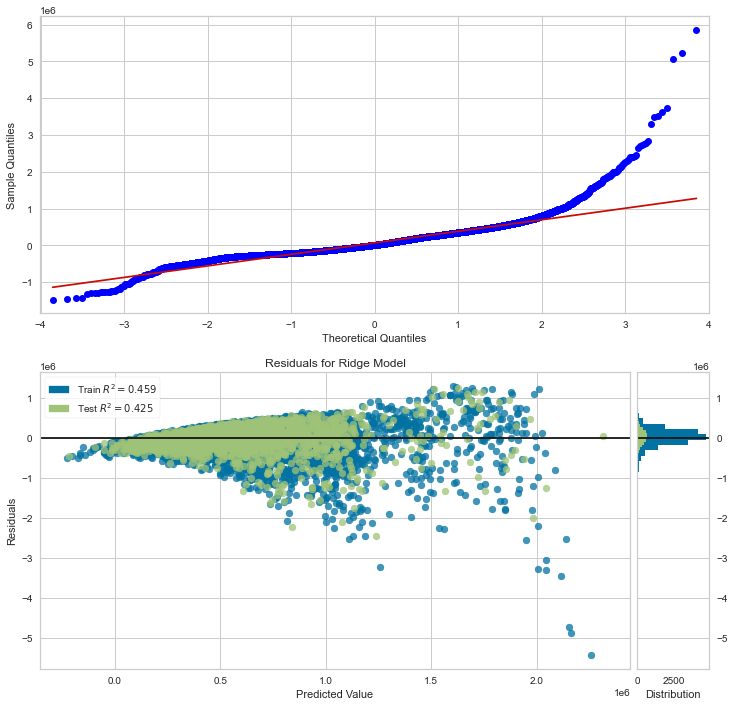

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              5881.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:35:03   Log-Likelihood:                     -2.4455e+05
No. Observations:               17270   AIC:                                  4.891e+05
Df Residuals:                   17262   BIC:                                  4.892e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bath < _1.5       4.492e+05   5789.620     77.590      0.000    4.38e+05    4.61e+05
bath < _2.0       4.974e+05   6062.038     82.045      0.000    4.85e+05    5.09e+05
bath < _2.5       5.641e+05   4950.884    113.936      0.000    5.54e+05    5.74e+05
bath < _3.0        8.09e+05   1.09e+04     74.266      0.000    7.88e+05     8.3e+05
bath < _3.5        9.48e+05   1.35e+04     70.313      0.000    9.22e+05    9.74e+05
bath < _4.0        1.35e+06   2.61e+04     51.729      0.000     1.3e+06     1.4e+06
bath < _4.5       1.743e+06   2.85e+04     61.199      0.000    1.69e+06     1.8e+06
logd sqft_living  2.278e+04   3129.372      7.278      0.000    1.66e+04    2.89e+04
==============================================================================
Omnibus:                     9971.798   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           296878.872
Skew:                           2.241   Prob(JB):                         0.00
Kurtosis:                      22.811   Cond. No.                         11.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from sklearn.model_selection import train_test_split

#noramlize log sqft living
master_df['logd sqft_living'] = np.log(master_df['sqft_living'])
master_df['logd sqft_living'] = master_df[['logd sqft_living']].apply(normalize)

#encode bathrooms
master_df['cat_bathrooms'] = master_df['bathrooms'].apply(bin_bathrooms)

bathroom_df = pd.get_dummies(master_df['cat_bathrooms'], drop_first=True, prefix='bath < ')
X_df = pd.concat([bathroom_df, master_df[['logd sqft_living']]], axis=1)
X_df

y_df = master_df['price']
y_df

model = model_maker(X_df, y_df)
model.summary()

In [39]:
#todo address outliers
#test different features
#

#notes
#may not predict homes with X+ bathrooms / bedrooms

Model R2: 0.8192432191701695
Train MSE: 78537717493.388
Test MSE: 70769737298.07552
Test for Normality
Test for Heteroskedasticity


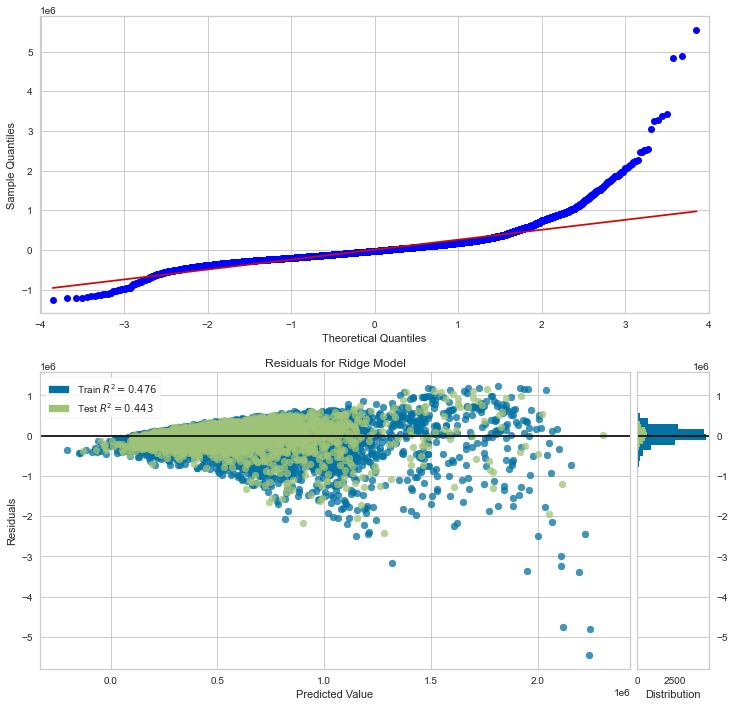

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              6022.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:35:03   Log-Likelihood:                     -2.4113e+05
No. Observations:               17270   AIC:                                  4.823e+05
Df Residuals:                   17257   BIC:                                  4.824e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bed < _2          6.603e+05   8399.795     78.607      0.000    6.44e+05    6.77e+05
bed < _3           5.47e+05   7044.528     77.646      0.000    5.33e+05    5.61e+05
bed < _4          5.258e+05   7426.380     70.797      0.000    5.11e+05     5.4e+05
bed < _5          5.161e+05   1.03e+04     50.003      0.000    4.96e+05    5.36e+05
bed < _6          3.986e+05   1.89e+04     21.090      0.000    3.62e+05    4.36e+05
bath < _1.5      -4.135e+04   7537.380     -5.486      0.000   -5.61e+04   -2.66e+04
bath < _2.0       -4.24e+04   8124.716     -5.218      0.000   -5.83e+04   -2.65e+04
bath < _2.5      -6.602e+04   8421.387     -7.839      0.000   -8.25e+04   -4.95e+04
bath < _3.0       1.107e+05   1.21e+04      9.159      0.000     8.7e+04    1.34e+05
bath < _3.5       1.763e+05   1.42e+04     12.437      0.000    1.48e+05    2.04e+05
bath < _4.0       5.002e+05   2.36e+04     21.168      0.000    4.54e+05    5.47e+05
bath < _4.5       8.403e+05    2.6e+04     32.273      0.000    7.89e+05    8.91e+05
logd sqft_living  2.104e+05   3521.992     59.736      0.000    2.03e+05    2.17e+05
==============================================================================
Omnibus:                    13595.811   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           848177.214
Skew:                           3.295   Prob(JB):                         0.00
Kurtosis:                      36.694   Cond. No.                         16.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from sklearn.model_selection import train_test_split

#noramlize log sqft living
master_df['logd sqft_living'] = np.log(master_df['sqft_living'])
master_df['logd sqft_living'] = master_df[['logd sqft_living']].apply(normalize)

#encode bathrooms
master_df['cat_bathrooms'] = master_df['bathrooms'].apply(bin_bathrooms)
bathroom_df = pd.get_dummies(master_df['cat_bathrooms'], drop_first=True, prefix='bath < ')

#encode bedrooms
bedroom_df = pd.get_dummies(master_df['bedrooms'].apply(bin_bedrooms), drop_first=True, prefix='bed < ')

X_df = pd.concat([bedroom_df, bathroom_df, master_df[['logd sqft_living']]], axis=1)
X_df

y_df = master_df['price']
y_df

model = model_maker(X_df, y_df)
model.summary()

In [45]:
master_df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.161300e+06
98004    1.359140e+06
98040    1.194874e+06
98112    1.099054e+06
98102    8.996077e+05
             ...     
98148    2.849086e+05
98001    2.811949e+05
98032    2.512962e+05
98168    2.403284e+05
98002    2.342840e+05
Name: price, Length: 70, dtype: float64

In [46]:
master_df.groupby('zipcode')['price'].count()

zipcode
98001    361
98002    199
98003    280
98004    316
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Name: price, Length: 70, dtype: int64

In [47]:
master_df['price'].sort_values(ascending=False)

7242     7700000.0
3908     7060000.0
9242     6890000.0
4405     5570000.0
1446     5350000.0
           ...    
2138       82500.0
8264       82000.0
16177      81000.0
465        80000.0
15274      78000.0
Name: price, Length: 21588, dtype: float64

In [48]:
master_df['price'].describe()

count    2.158800e+04
mean     5.402559e+05
std      3.674063e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

# non luxury homes

<AxesSubplot:xlabel='price', ylabel='Density'>

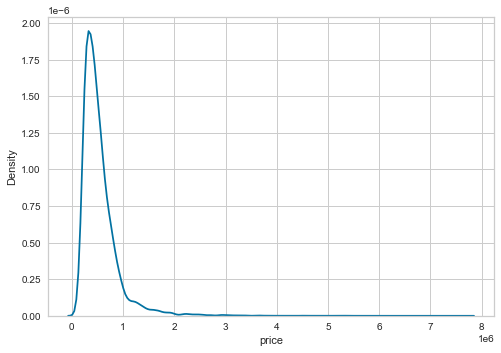

In [49]:
sns.kdeplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

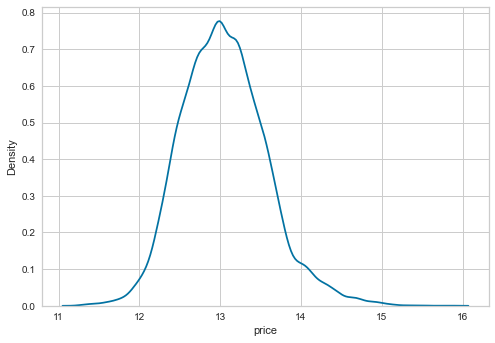

In [50]:
sns.kdeplot(np.log(df['price']))

In [52]:
quantile97 = master_df['price'].quantile(.97)

In [55]:
non_luxury_df = master_df[master_df['price'] < quantile97]
non_luxury_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logd sqft_living,cat_bathrooms
count,2.092500e+04,20925.000000,20925.000000,20925.000000,2.092500e+04,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000,20925.000000
mean,4.947759e+05,3.346523,2.074014,2011.078519,1.470947e+04,1.482461,1735.114886,285.809852,1970.881004,63.514026,98078.449510,47.558244,-122.213541,1946.899403,12517.979833,-0.057321,1.992354
std,2.363182e+05,0.891783,0.725400,812.346317,3.997329e+04,0.537144,753.524244,419.868265,29.251106,350.321207,53.379494,0.140044,0.141818,640.775269,26469.810780,0.954511,0.712419
min,7.800000e+04,1.000000,0.500000,370.000000,5.720000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-3.859401,1.000000
25%,3.190000e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.464600,-122.330000,1480.000000,5076.000000,-0.705707,1.500000
50%,4.430000e+05,3.000000,2.250000,1880.000000,7.540000e+03,1.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.568800,-122.231000,1820.000000,7560.000000,-0.027554,2.000000
75%,6.200000e+05,4.000000,2.500000,2480.000000,1.043300e+04,2.000000,2140.000000,580.000000,1996.000000,0.000000,98118.000000,47.679100,-122.123000,2310.000000,9956.000000,0.625387,2.500000
max,1.380000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,7320.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,3.227785,4.500000


<ipython-input-56-37ddc1324153>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['logd sqft_living'] = np.log(non_luxury_df['sqft_living'])
<ipython-input-56-37ddc1324153>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['logd sqft_living'] = non_luxury_df[['logd sqft_living']].apply(normalize)
<ipython-input-56-37ddc1324153>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Model R2: 0.784087174283493
Train MSE: 64755090816.27729
Test MSE: 67372359727.93825
Test for Normality
Test for Heteroskedasticity


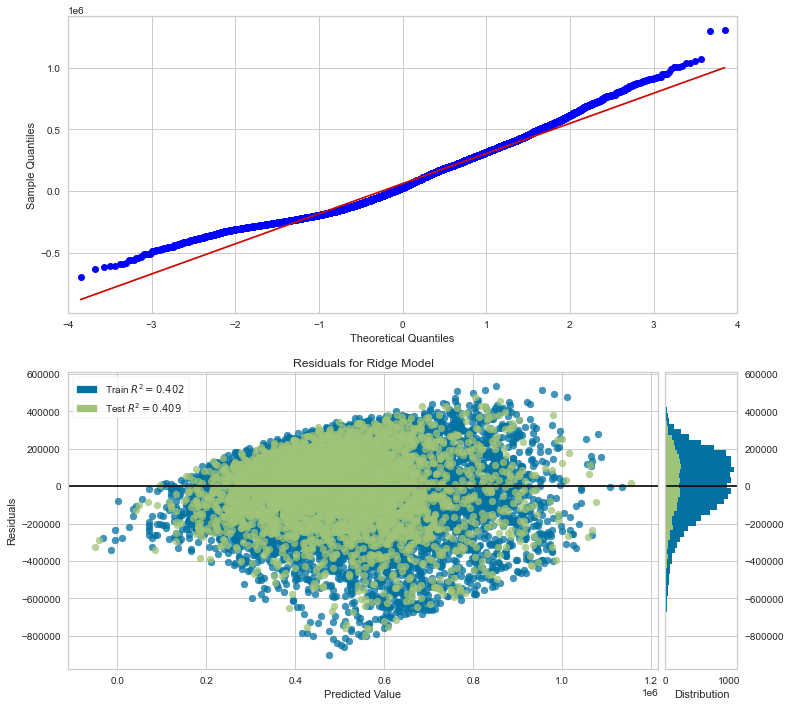

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              7600.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:55:35   Log-Likelihood:                     -2.3211e+05
No. Observations:               16740   AIC:                                  4.642e+05
Df Residuals:                   16732   BIC:                                  4.643e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bath < _1.5         4.3e+05   4304.062     99.906      0.000    4.22e+05    4.38e+05
bath < _2.0        4.83e+05   4533.705    106.546      0.000    4.74e+05    4.92e+05
bath < _2.5       5.587e+05   3770.884    148.157      0.000    5.51e+05    5.66e+05
bath < _3.0       7.001e+05   8484.721     82.515      0.000    6.83e+05    7.17e+05
bath < _3.5       8.368e+05   1.09e+04     76.428      0.000    8.15e+05    8.58e+05
bath < _4.0       9.462e+05   2.48e+04     38.155      0.000    8.98e+05    9.95e+05
bath < _4.5       9.135e+05   3.08e+04     29.692      0.000    8.53e+05    9.74e+05
logd sqft_living  -1.97e+04   2295.735     -8.580      0.000   -2.42e+04   -1.52e+04
==============================================================================
Omnibus:                      775.978   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.691
Skew:                           0.564   Prob(JB):                    1.05e-193
Kurtosis:                       3.037   Cond. No.                         16.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from sklearn.model_selection import train_test_split

#noramlize log sqft living
non_luxury_df['logd sqft_living'] = np.log(non_luxury_df['sqft_living'])
non_luxury_df['logd sqft_living'] = non_luxury_df[['logd sqft_living']].apply(normalize)

#encode bathrooms
non_luxury_df['cat_bathrooms'] = non_luxury_df['bathrooms'].apply(bin_bathrooms)

bathroom_df = pd.get_dummies(non_luxury_df['cat_bathrooms'], drop_first=True, prefix='bath < ')
X_df = pd.concat([bathroom_df, non_luxury_df[['logd sqft_living']]], axis=1)
X_df

y_df = non_luxury_df['price']
y_df

model = model_maker(X_df, y_df)
model.summary()

<ipython-input-58-62047cdd1bd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['logd sqft_living'] = np.log(non_luxury_df['sqft_living'])
<ipython-input-58-62047cdd1bd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['logd sqft_living'] = non_luxury_df[['logd sqft_living']].apply(normalize)
<ipython-input-58-62047cdd1bd9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Model R2: 0.8800809556580558
Train MSE: 35954548170.24202
Test MSE: 35817525987.58042
Test for Normality
Test for Heteroskedasticity


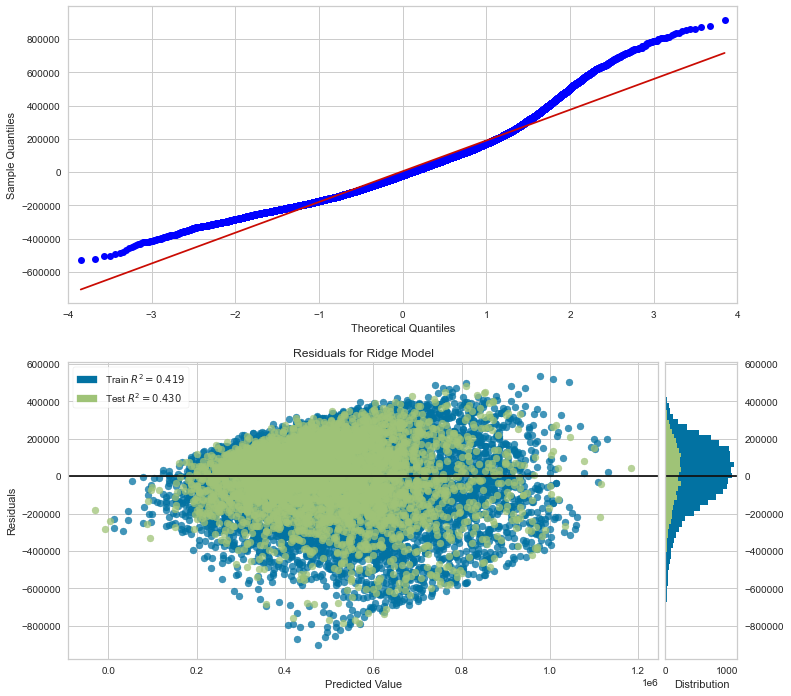

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              9451.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:58:19   Log-Likelihood:                     -2.2719e+05
No. Observations:               16740   AIC:                                  4.544e+05
Df Residuals:                   16727   BIC:                                  4.545e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bed < _2          5.403e+05   5663.402     95.409      0.000    5.29e+05    5.51e+05
bed < _3          4.677e+05   4708.127     99.342      0.000    4.58e+05    4.77e+05
bed < _4          4.682e+05   5028.195     93.116      0.000    4.58e+05    4.78e+05
bed < _5          4.521e+05   7143.842     63.284      0.000    4.38e+05    4.66e+05
bed < _6          4.007e+05   1.37e+04     29.181      0.000    3.74e+05    4.28e+05
bath < _1.5      -1915.6327   5107.937     -0.375      0.708   -1.19e+04    8096.465
bath < _2.0       1.029e+04   5499.636      1.870      0.061    -494.513    2.11e+04
bath < _2.5       7011.1498   5726.254      1.224      0.221   -4212.914    1.82e+04
bath < _3.0       1.018e+05   8330.593     12.214      0.000    8.54e+04    1.18e+05
bath < _3.5       1.752e+05   1.01e+04     17.385      0.000    1.55e+05    1.95e+05
bath < _4.0        2.41e+05   1.96e+04     12.278      0.000    2.03e+05    2.79e+05
bath < _4.5        1.75e+05   2.42e+04      7.218      0.000    1.27e+05    2.23e+05
logd sqft_living  1.298e+05   2335.143     55.581      0.000    1.25e+05    1.34e+05
==============================================================================
Omnibus:                     2512.103   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4381.705
Skew:                           0.984   Prob(JB):                         0.00
Kurtosis:                       4.552   Cond. No.                         18.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
from sklearn.model_selection import train_test_split

#noramlize log sqft living
non_luxury_df['logd sqft_living'] = np.log(non_luxury_df['sqft_living'])
non_luxury_df['logd sqft_living'] = non_luxury_df[['logd sqft_living']].apply(normalize)

#encode bathrooms
non_luxury_df['cat_bathrooms'] = non_luxury_df['bathrooms'].apply(bin_bathrooms)
bathroom_df = pd.get_dummies(non_luxury_df['cat_bathrooms'], drop_first=True, prefix='bath < ')

bedroom_df = pd.get_dummies(non_luxury_df['bedrooms'].apply(bin_bedrooms), drop_first=True, prefix='bed < ')

X_df = pd.concat([bedroom_df, bathroom_df, non_luxury_df[['logd sqft_living']]], axis=1)
X_df

y_df = non_luxury_df['price']
y_df

model = model_maker(X_df, y_df)
model.summary()

# bathroom per sqft on non luxury

In [61]:
non_luxury_df['bathroom_per_sqft'] = non_luxury_df['sqft_living'] / non_luxury_df['bathrooms']
non_luxury_df.head()

<ipython-input-61-bd640ca5520f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['bathroom_per_sqft'] = non_luxury_df['sqft_living'] / non_luxury_df['bathrooms']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logd sqft_living,cat_bathrooms,bathroom_per_sqft
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,...,1955,0.0,98178,47.5112,-122.257,1340,5650,-1.119095,1.0,1180.000000
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.803299,2.0,1142.222222
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,...,1933,0.0,98028,47.7379,-122.233,2720,8062,-2.173359,1.0,770.000000
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.134106,3.0,653.333333
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,...,1987,0.0,98074,47.6168,-122.045,1800,7503,-0.246600,2.0,840.000000


<ipython-input-62-7c93b1225b7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['logd sqft_living'] = np.log(non_luxury_df['sqft_living'])
<ipython-input-62-7c93b1225b7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_luxury_df['logd sqft_living'] = non_luxury_df[['logd sqft_living']].apply(normalize)
<ipython-input-62-7c93b1225b7d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Model R2: 0.8752400285938596
Train MSE: 37419389467.49355
Test MSE: 36339789947.51257
Test for Normality
Test for Heteroskedasticity


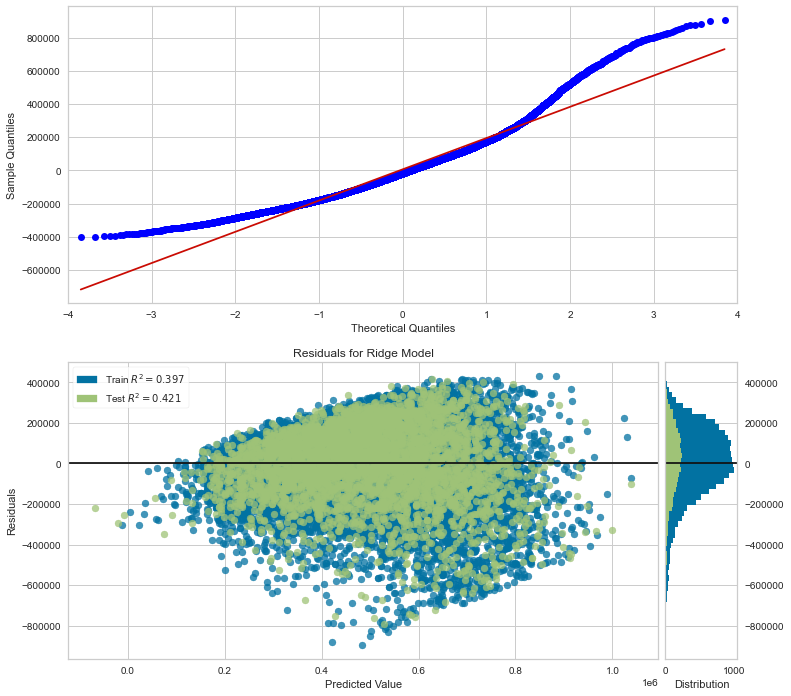

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                          1.678e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:10:07   Log-Likelihood:                     -2.2752e+05
No. Observations:               16740   AIC:                                  4.551e+05
Df Residuals:                   16733   BIC:                                  4.551e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bed < _2           5.627e+05   4696.461    119.822      0.000    5.54e+05    5.72e+05
bed < _3           4.817e+05   2237.613    215.280      0.000    4.77e+05    4.86e+05
bed < _4           4.831e+05   2907.630    166.165      0.000    4.77e+05    4.89e+05
bed < _5           4.893e+05   5953.140     82.198      0.000    4.78e+05    5.01e+05
bed < _6           4.673e+05   1.31e+04     35.743      0.000    4.42e+05    4.93e+05
bathroom_per_sqft  -378.3564   1657.674     -0.228      0.819   -3627.573    2870.861
logd sqft_living   1.475e+05   2066.477     71.376      0.000    1.43e+05    1.52e+05
==============================================================================
Omnibus:                     2638.543   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4682.097
Skew:                           1.019   Prob(JB):                         0.00
Kurtosis:                       4.599   Cond. No.                         10.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
from sklearn.model_selection import train_test_split

#noramlize log sqft living
non_luxury_df['logd sqft_living'] = np.log(non_luxury_df['sqft_living'])
non_luxury_df['logd sqft_living'] = non_luxury_df[['logd sqft_living']].apply(normalize)

#normalize sqft bathrooms
non_luxury_df['bathroom_per_sqft'] = np.log(non_luxury_df['bathroom_per_sqft'])
non_luxury_df['bathroom_per_sqft'] = non_luxury_df[['bathroom_per_sqft']].apply(normalize)

#encode bedrooms
bedroom_df = pd.get_dummies(non_luxury_df['bedrooms'].apply(bin_bedrooms), drop_first=True, prefix='bed < ')

X_df = pd.concat([bedroom_df, non_luxury_df[['bathroom_per_sqft']], non_luxury_df[['logd sqft_living']]], axis=1)
X_df

y_df = non_luxury_df['price']
y_df

model = model_maker(X_df, y_df)
model.summary()

# bathroom as numeric on non luxury